In [1]:
import pandas as pd
import os
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline  

columns = ['uf', 'cidade', 'zona', 'secao', 'cargo', 'candidato', 'votos']
df = pd.read_csv('./out.txt', sep=';', names=columns)


<BarContainer object of 28 artists>

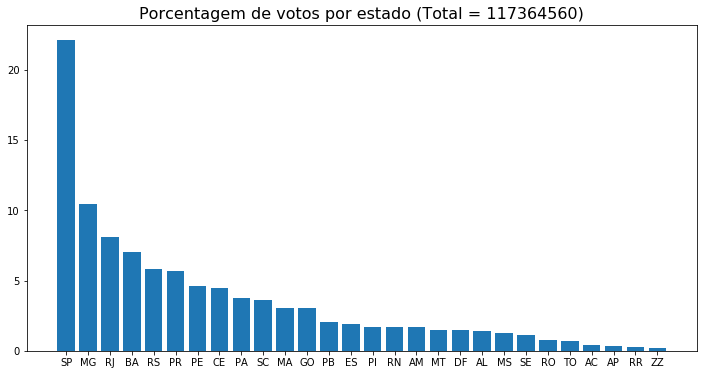

In [18]:
matplotlib.rcParams['figure.figsize'] = [12, 6]
matplotlib.rcParams['axes.titlesize'] = 16

votos_estado = df[df.cargo == 'Presidente'].groupby('uf').sum().sort_values('votos', ascending=False)
total_votos = votos_estado.sum().votos
votos_estado['porcent_votos'] = 100 * votos_estado.votos / total_votos
plt.title("Porcentagem de votos por estado (Total = %s)" % total_votos)
plt.bar(votos_estado.index, votos_estado.porcent_votos)


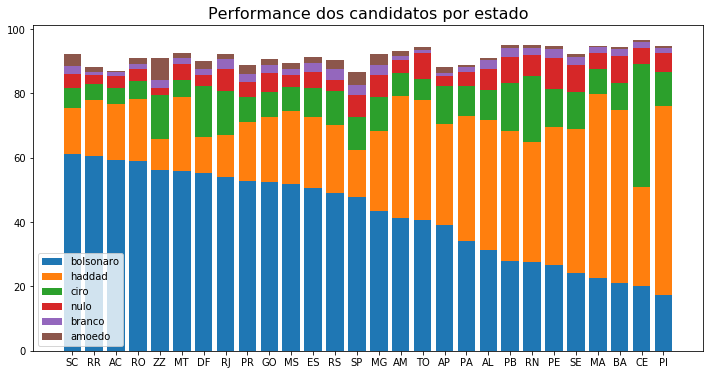

In [78]:
presidente = df[df.cargo == 'Presidente']
t = presidente.groupby('uf').sum()
nomes = ['JAIR BOLSONARO', 'FERNANDO HADDAD', 'CIRO GOMES', 'Nulo', 'Branco', 'JOÃO AMOÊDO']
colunas = ['bolsonaro', 'haddad', 'ciro', 'nulo', 'branco', 'amoedo']
a_somas = [presidente[presidente.candidato == n].groupby('uf').sum() for n in nomes]
s = a_somas[0]
for c, a_soma in zip(colunas, a_somas):
    s[c] = a_soma.votos
s['total'] = t.votos
for c in colunas:
    s['porcent_%s' % c] = 100 * s[c] / s.total
s = s.sort_values('porcent_bolsonaro', ascending=False)
plt.title('Performance dos candidatos por estado')
bottom = None
plts = []
for c in colunas:
    plts.append(plt.bar(s.index, s['porcent_%s' % c], bottom=bottom))
    bottom = s['porcent_%s' % c] if bottom is None else bottom + s['porcent_%s' % c]
plt.legend([p[0] for p in plts], colunas)
